### `Paper` Al Khourdajie, A., Skea, J., & Green, R. (2024). Climate ambition, background scenario or the model? Attribution of the variance of energy-related indicators in global scenarios. Energy and Climate Change, 100126. ISSN 2666-2787. https://doi.org/10.1016/j.egycc.2024.100126.
### `Version` January 2024 
### `Authors` Alaa Al Khourdajie, Jim Skea, Richard Green

### Script: `Appendix C - Detailed Figures`
Code to generate Appendix C detailed figures, as well as Figure D.2 (Appendix D).

1. Import libraries and load the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings

In [2]:
# Load the prepared SSPs data
ssps_df = pd.read_csv("../05_data/df_ssps_cleaned.csv")

In [3]:
# dataframe describe
ssps_df.describe()

,Unnamed: 0,year,Primary_Energy,Primary_Energy_Wind,Primary_Energy_Solar,Primary_Energy_Biomass,Primary_Energy_Biomass_w_CCS,Primary_Energy_Hydro,Primary_Energy_Nuclear,Primary_Energy_Geothermal,...,Final_Energy_Gases,Final_Energy_Heat,Final_Energy_Liquids,Final_Energy_Solids,Final_Energy_Solar,Final_Energy_Electrification,Price_Carbon,GDP_PPP,cumulative_emissions,squared_cumulative_emissions
count,1270.00000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1200.000000,1270.000000,1270.000000,790.000000,...,1270.000000,1020.000000,1270.000000,1270.000000,630.000000,1270.000000,1.150000e+03,1270.000000,1270.000000,1.270000e+03
mean,634.50000,2055.000000,754.604110,45.502617,39.094701,110.294196,43.040660,21.047519,34.301396,3.329422,...,82.260698,15.837969,188.541961,67.103284,28.697332,0.345946,4.421554e-01,294.899930,2928.676941,1.175128e+07
std,366.76173,28.734128,233.157638,52.761159,52.287029,75.269297,73.222249,6.991660,37.966531,6.717801,...,43.096969,12.107126,76.567148,34.213986,26.467908,0.144403,1.739960e+00,202.574095,1782.311061,1.358800e+07
min,0.00000,2010.000000,320.039460,0.438500,0.091900,30.491735,0.000000,8.862000,0.000300,0.010000,...,1.006200,0.007765,6.100989,0.311200,0.121414,0.166853,0.000000e+00,64.808103,126.585175,1.602381e+04
25%,317.25000,2030.000000,586.795578,8.530225,3.763900,58.085600,0.000000,15.854228,12.072246,0.360550,...,54.316913,7.722811,145.006528,42.549043,6.075682,0.234879,1.303597e-22,144.812906,1483.215644,2.199929e+06
50%,634.50000,2055.000000,710.327984,26.696415,22.624201,84.666403,2.952582,20.764100,21.396979,0.845350,...,75.042744,12.245000,181.865958,65.556269,23.980082,0.307968,4.066640e-02,247.254192,2750.123960,7.563182e+06
75%,951.75000,2080.000000,858.498625,61.327165,52.348618,141.624925,59.437624,24.599700,39.794963,3.896118,...,102.298580,21.769775,229.511667,90.199245,42.789487,0.429348,2.461900e-01,397.993530,4103.959651,1.684248e+07
max,1269.00000,2100.000000,1824.000000,388.534660,395.800000,477.000000,417.200000,47.630000,251.698000,55.470000,...,281.913000,84.123000,586.378096,243.141000,163.365636,0.902031,3.185248e+01,1034.177000,8236.910903,6.784670e+07


In [4]:
# Data types of the columns in the dataframe
ssps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 51 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        1270 non-null   int64  
 1   model                                             1270 non-null   object 
 2   scenario                                          1270 non-null   object 
 3   year                                              1270 non-null   int64  
 4   rcp                                               1270 non-null   object 
 5   mod_scen_combined                                 1270 non-null   object 
 6   Primary_Energy                                    1270 non-null   float64
 7   Primary_Energy_Wind                               1270 non-null   float64
 8   Primary_Energy_Solar                              1270 non-null   float64
 9   Primary_Energy_Biom

Some additional data cleaning and preparations

In [5]:
# In ssps_df, change the "_" in column names to " "
ssps_df.columns = ssps_df.columns.str.replace('_', ' ')

In [6]:
ssps_df = ssps_df.rename(columns={col: 'Primary Energy Unabated ' + col.split(' wo CCS')[0].split(' ')[-1] for col in ssps_df.columns if 'wo CCS' in col})

In [7]:
def extract_y_vars(df):
    y_vars = df.columns[df.columns.get_loc("Primary Energy"):df.columns.get_loc("Price Carbon") + 1].tolist()
    return y_vars
y_vars = extract_y_vars(ssps_df)

2) Plotting the figures

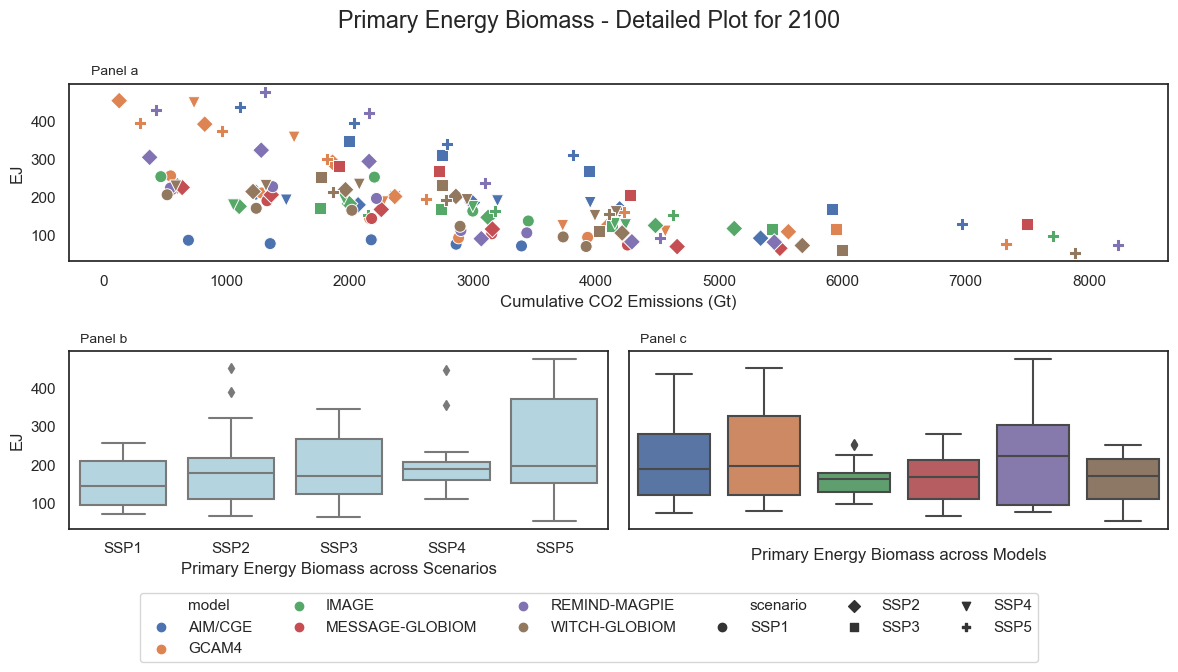

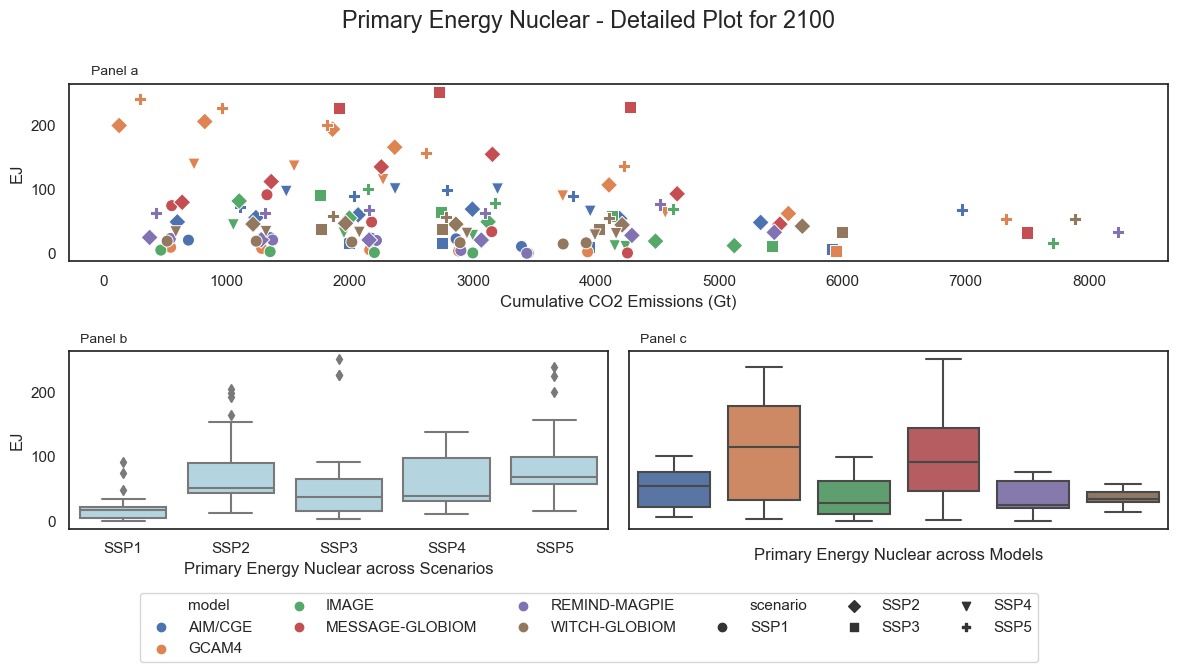

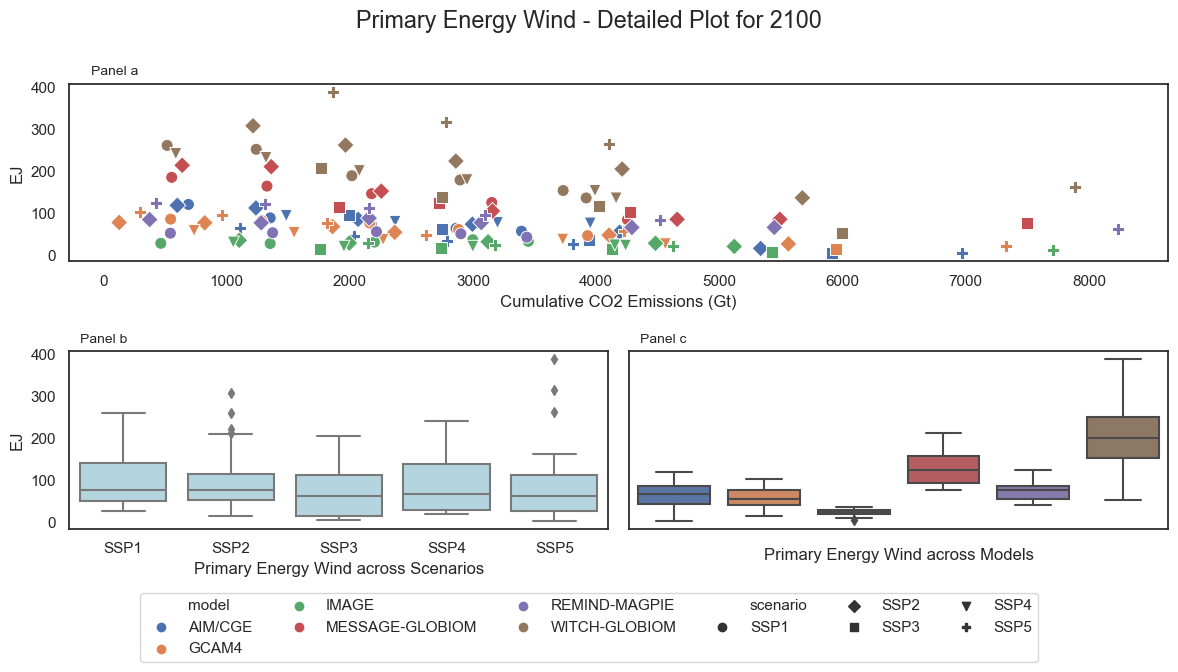

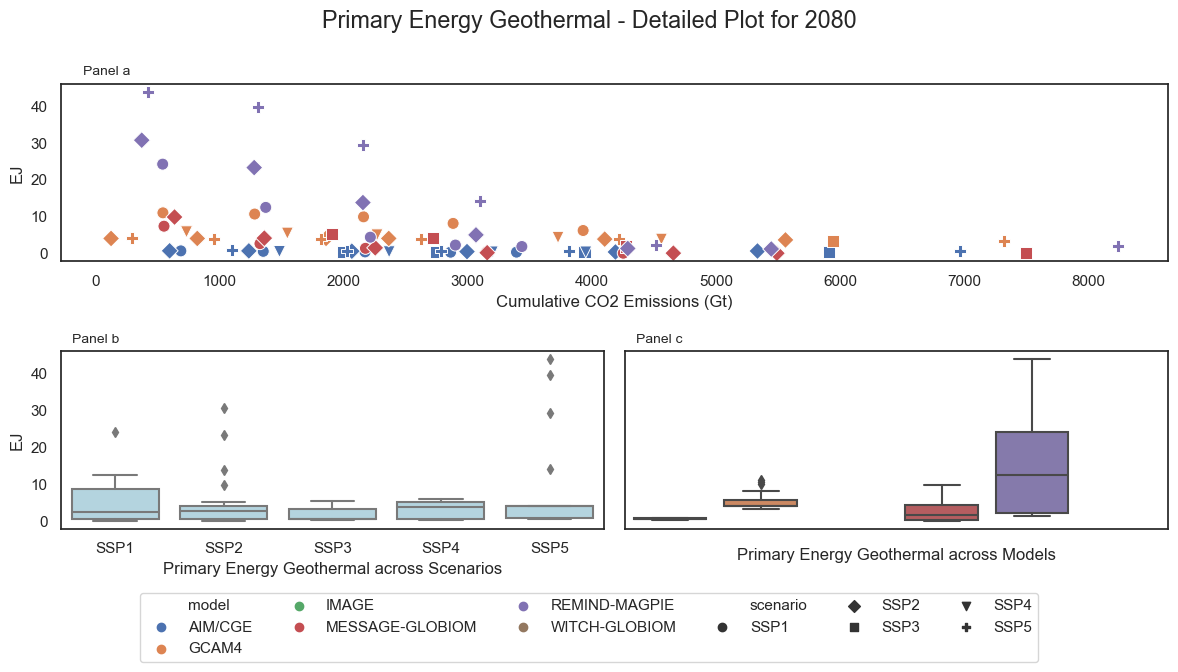

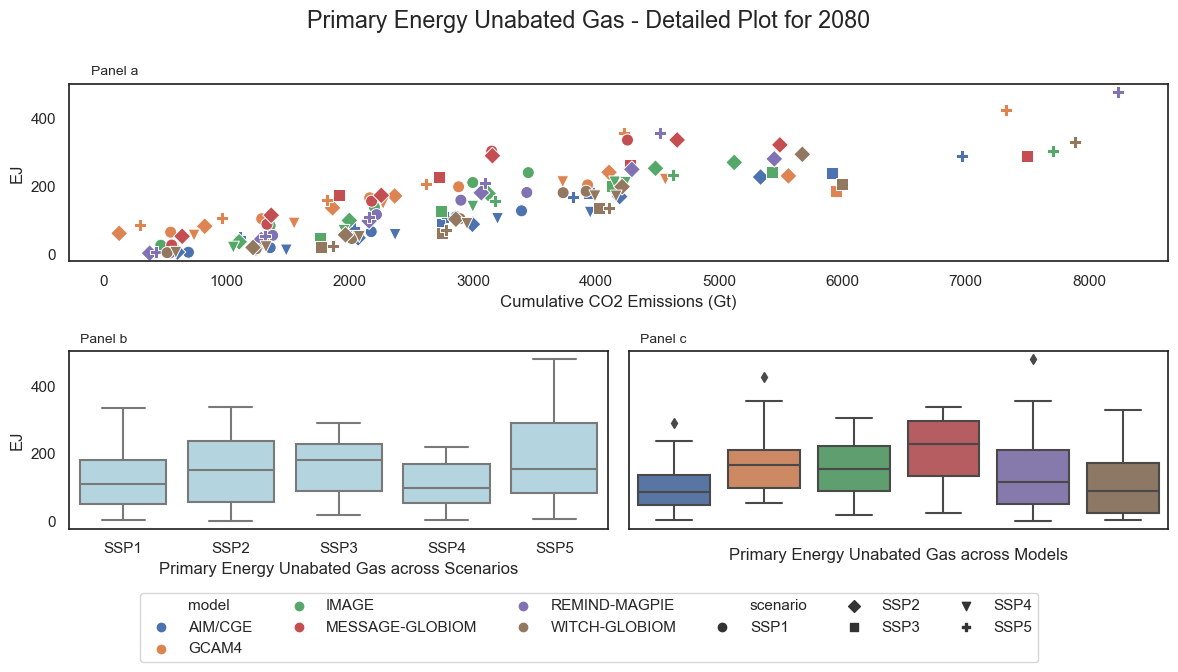

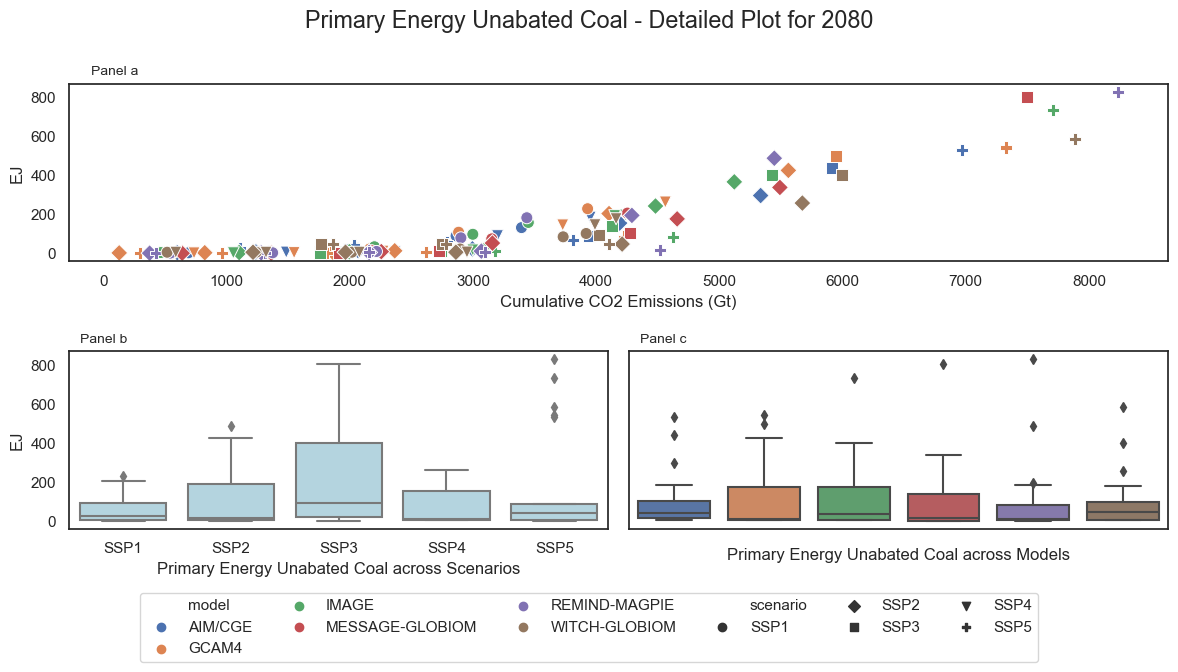

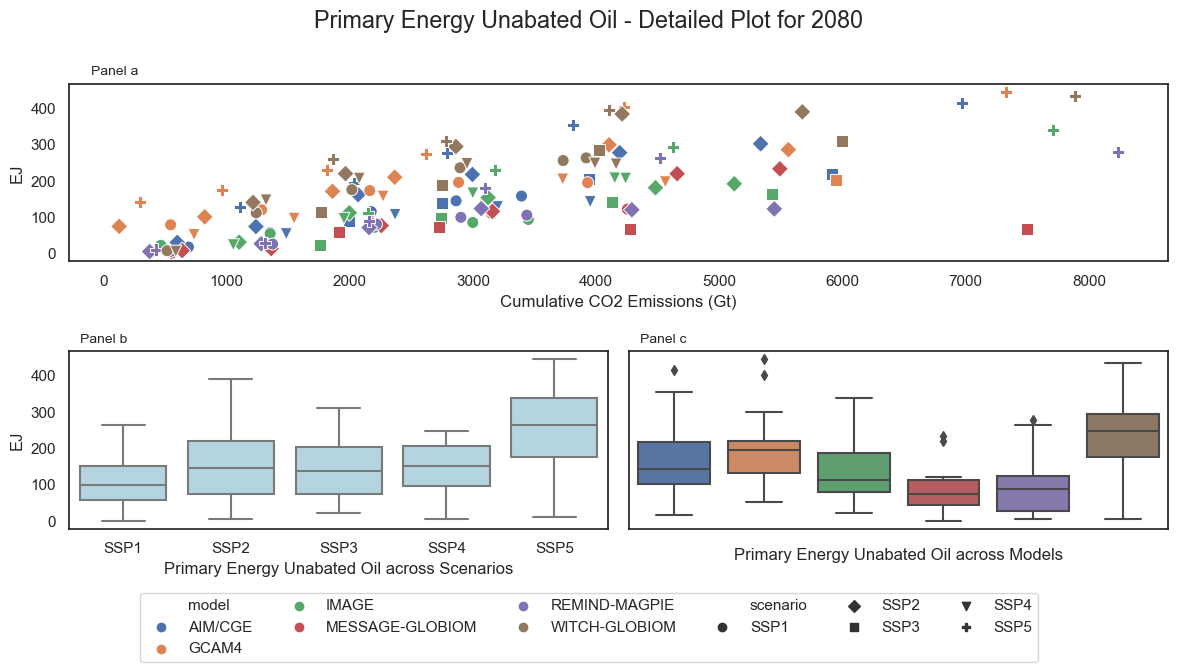

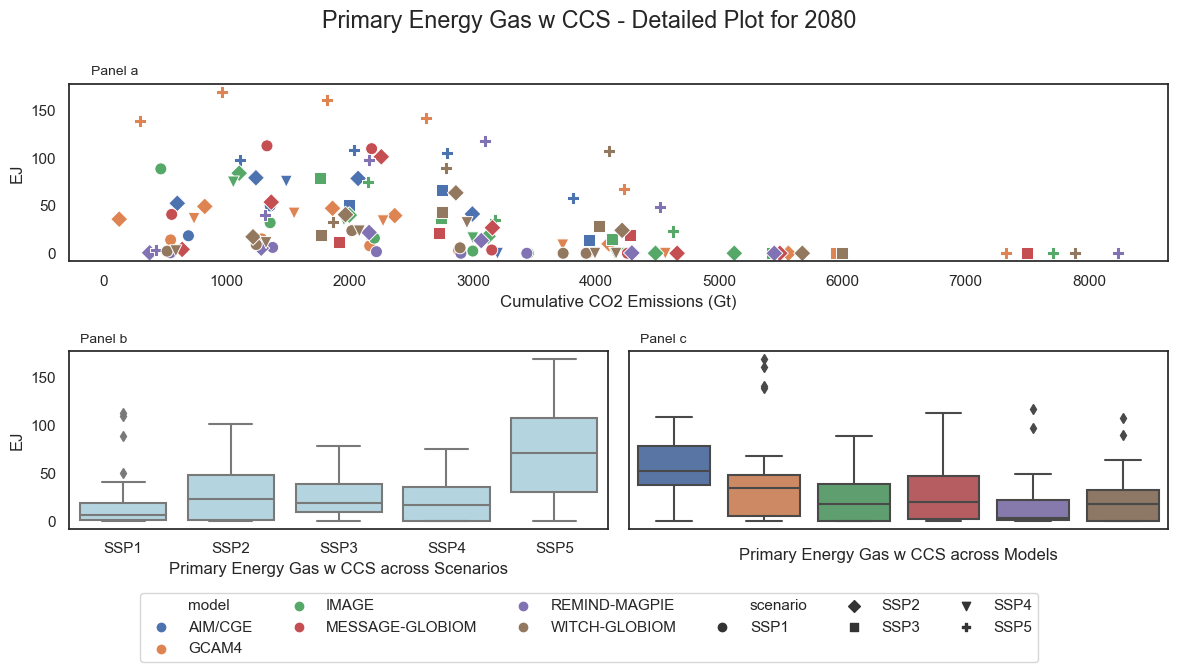

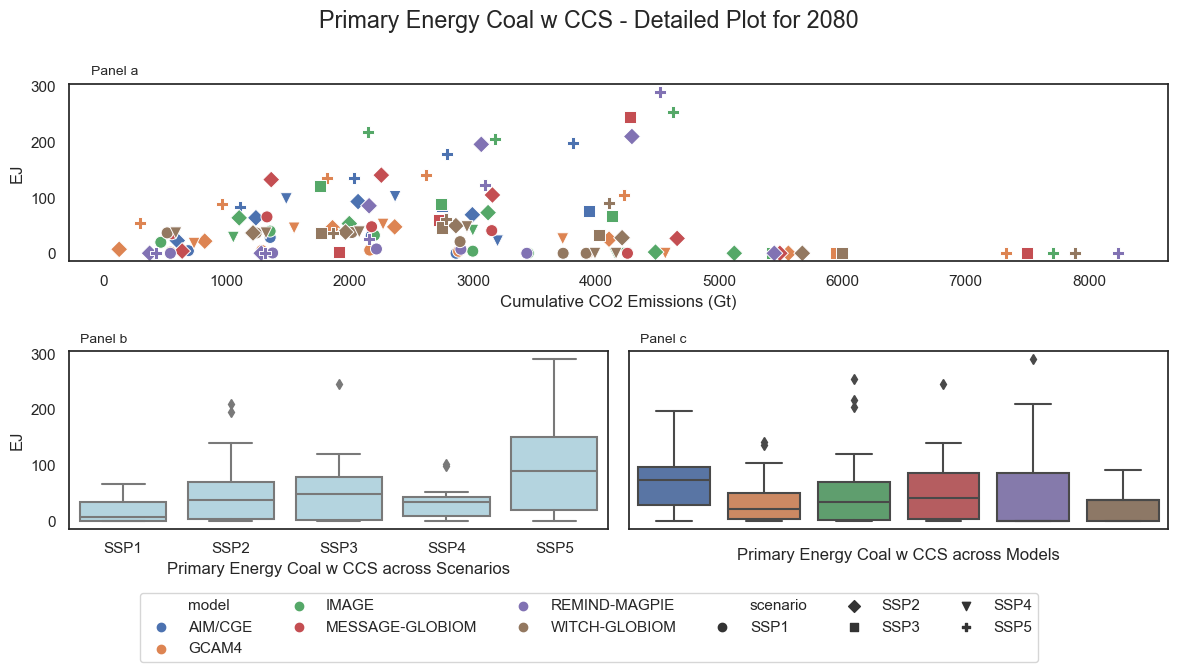

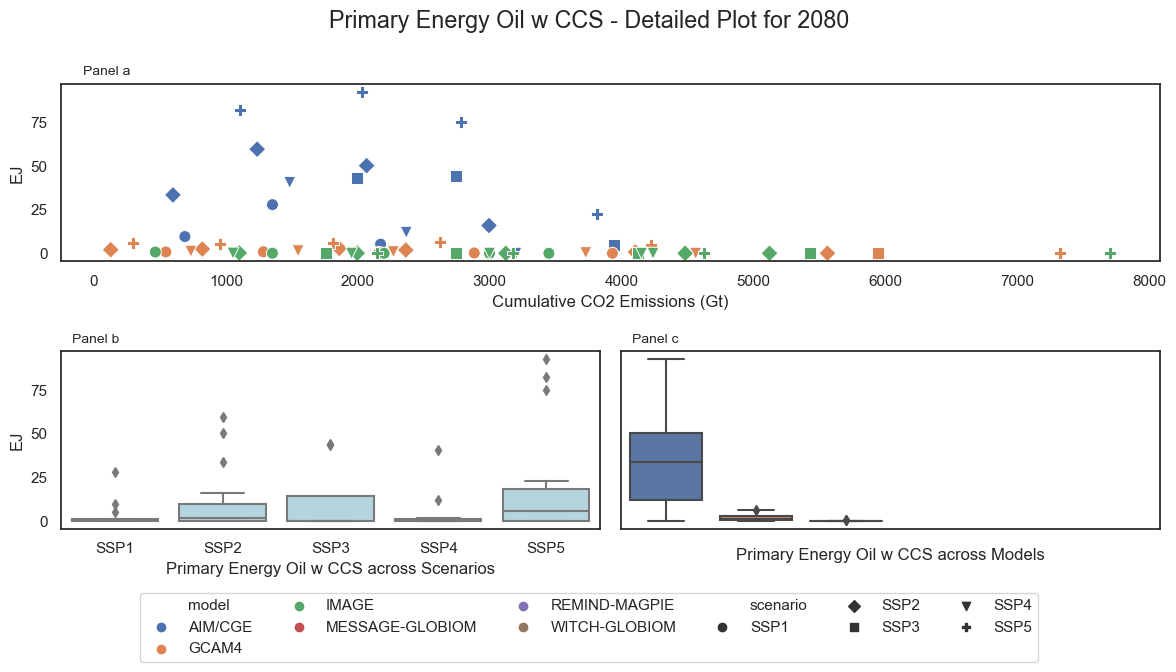

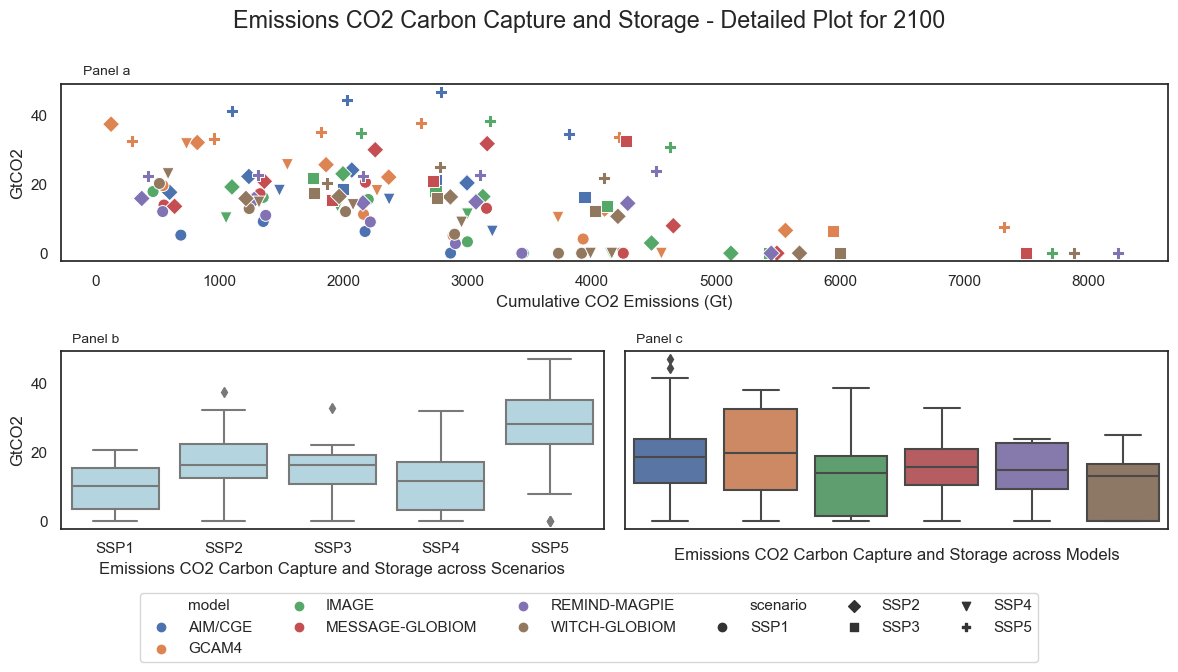

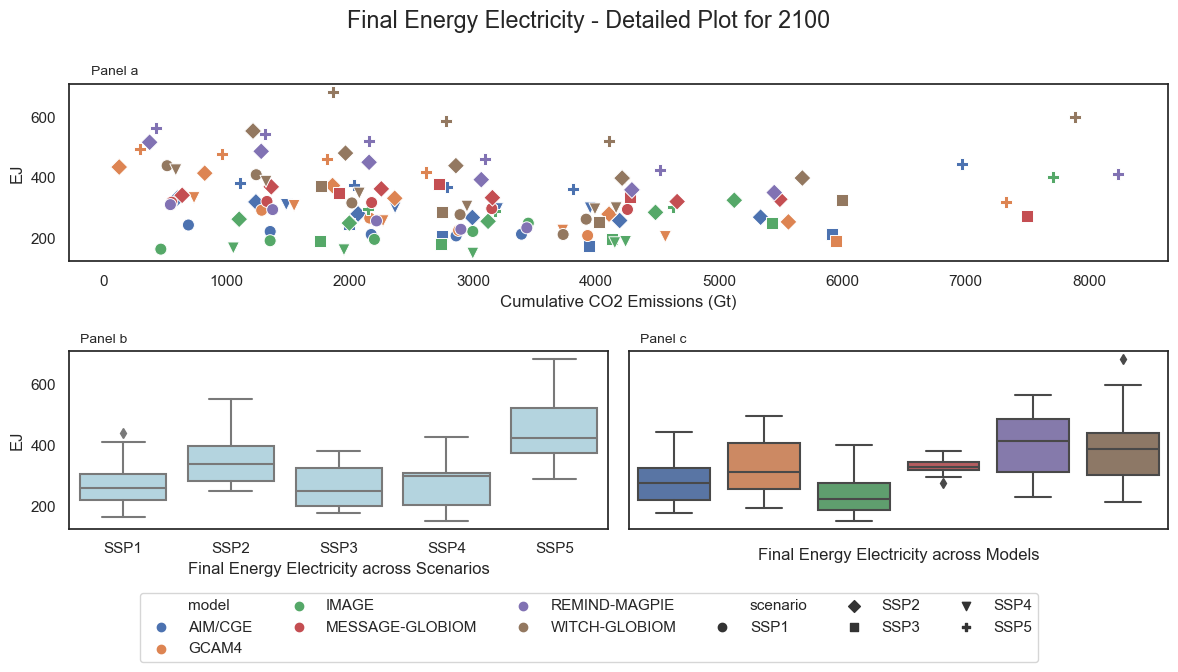

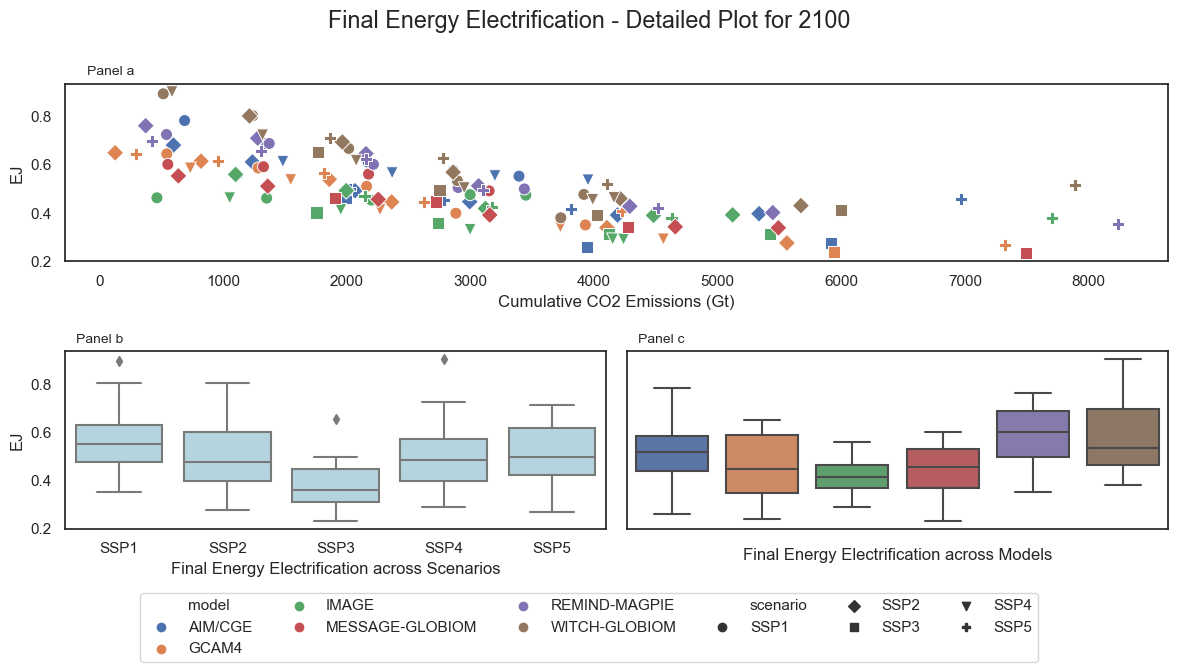

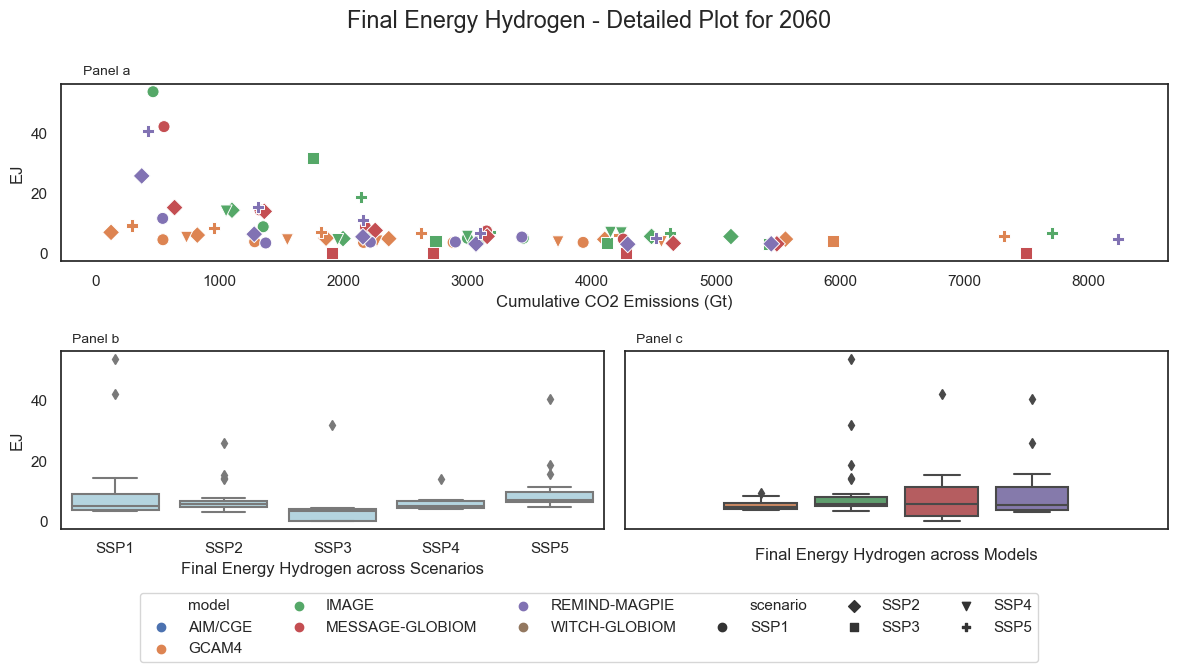

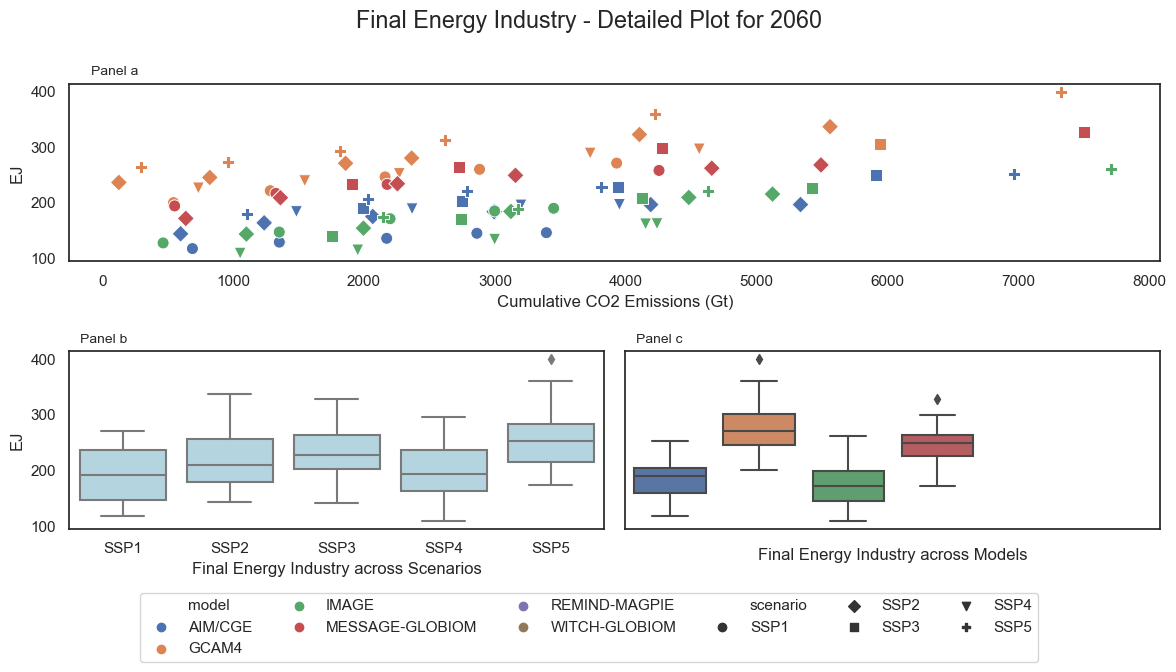

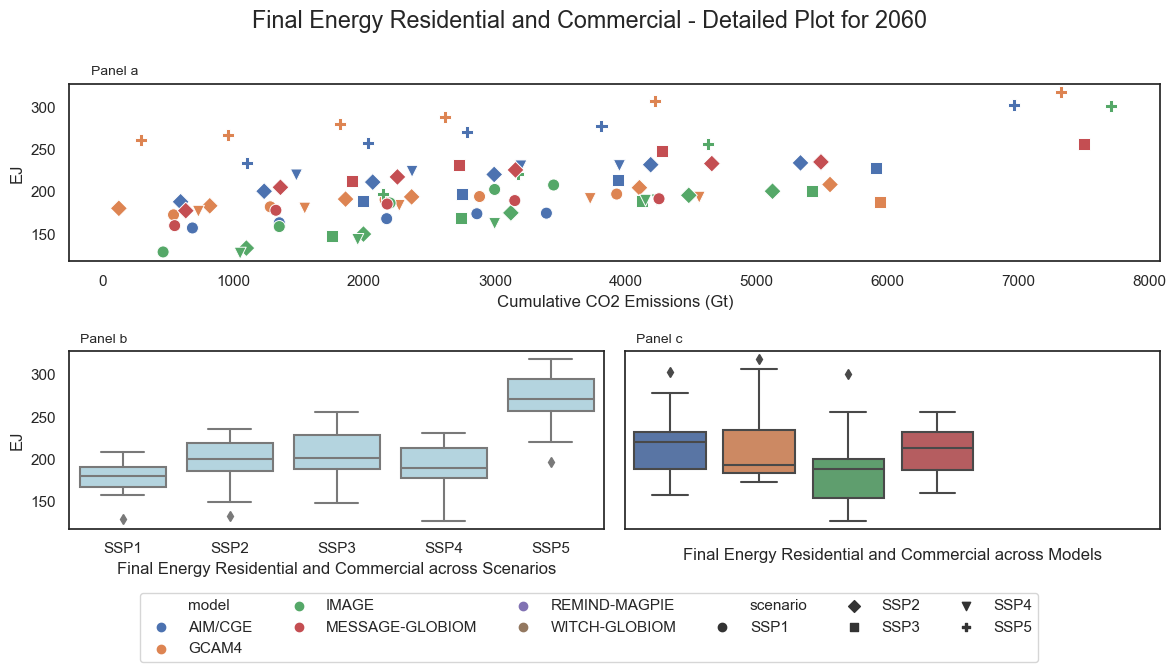

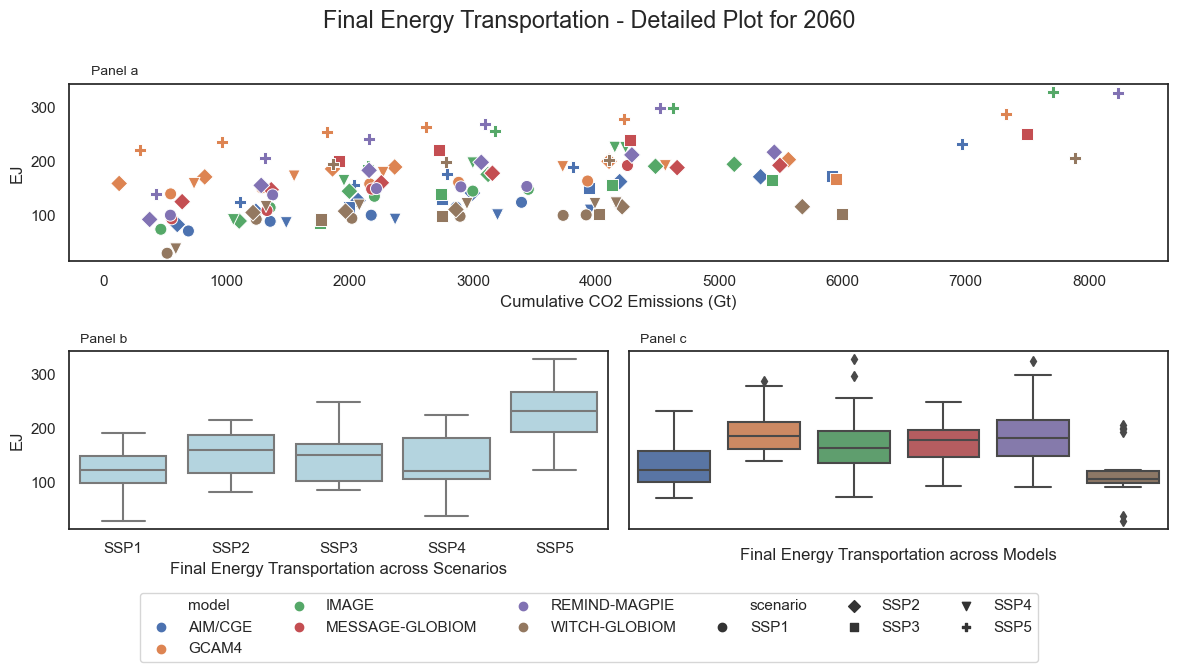

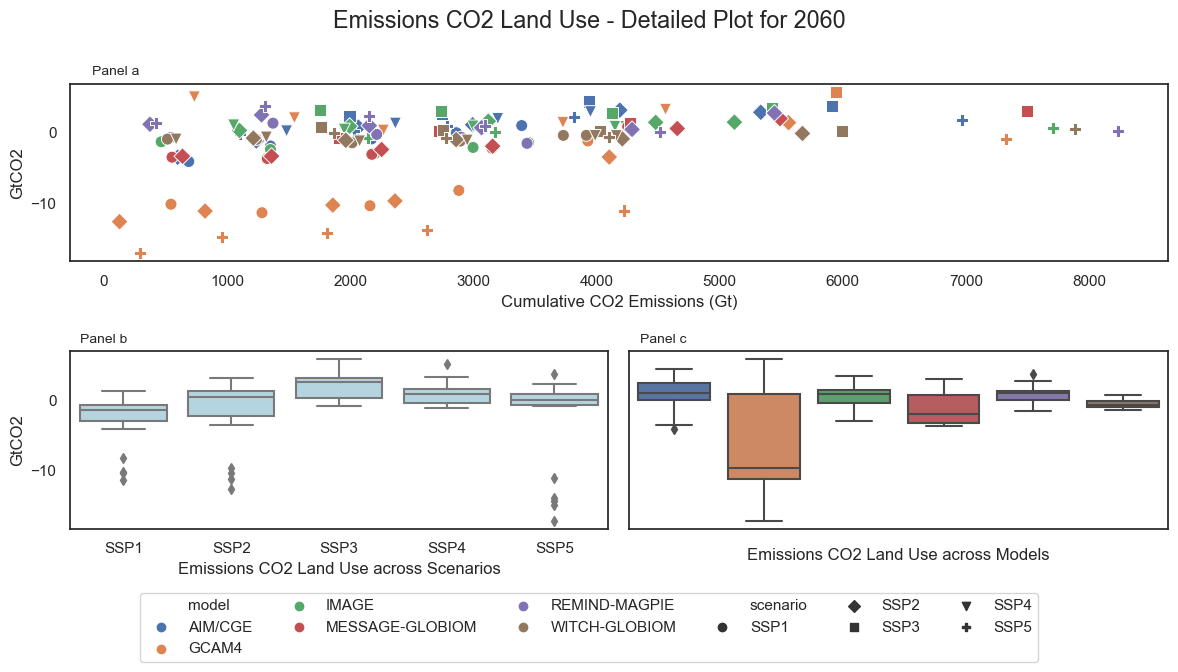

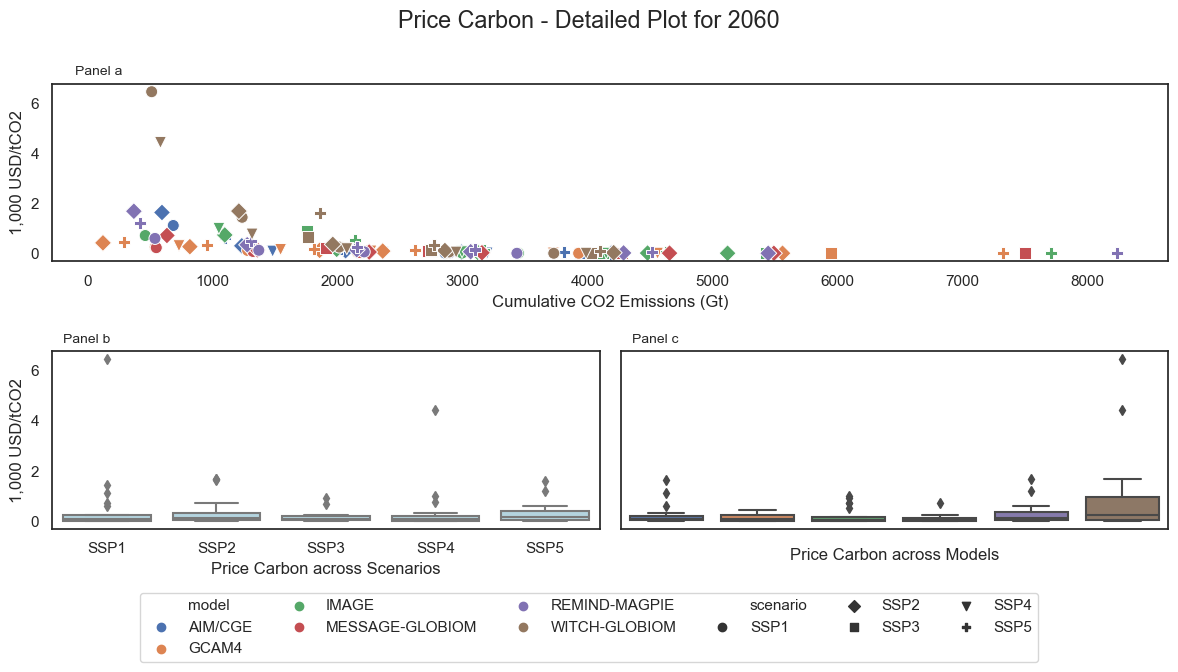

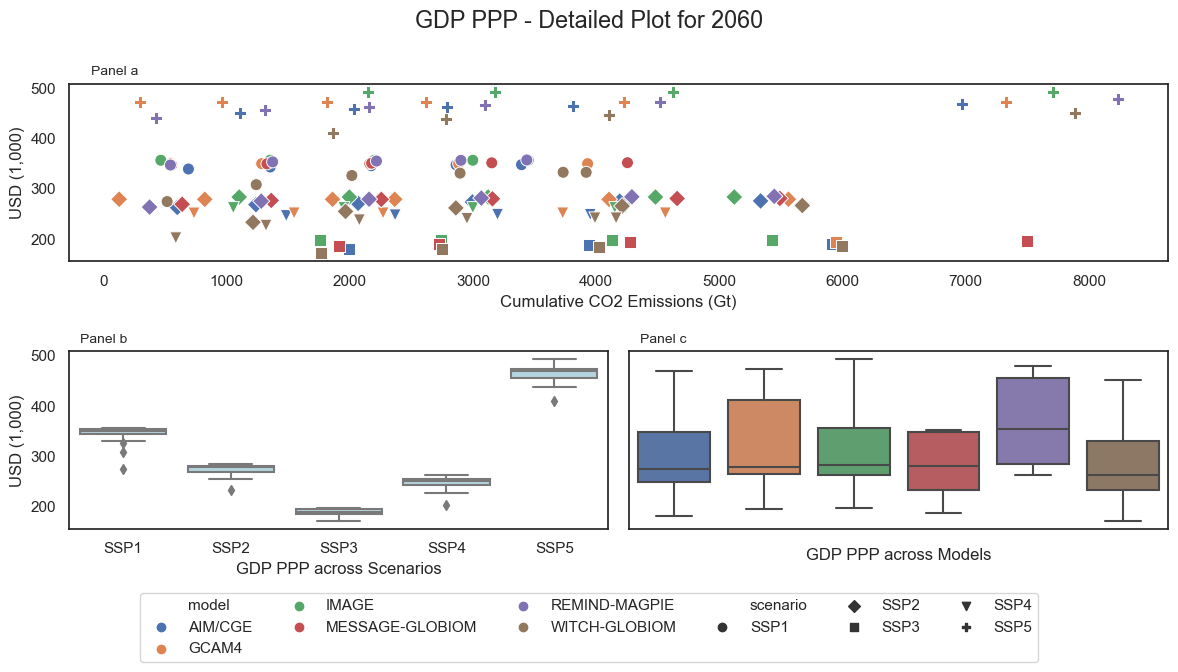

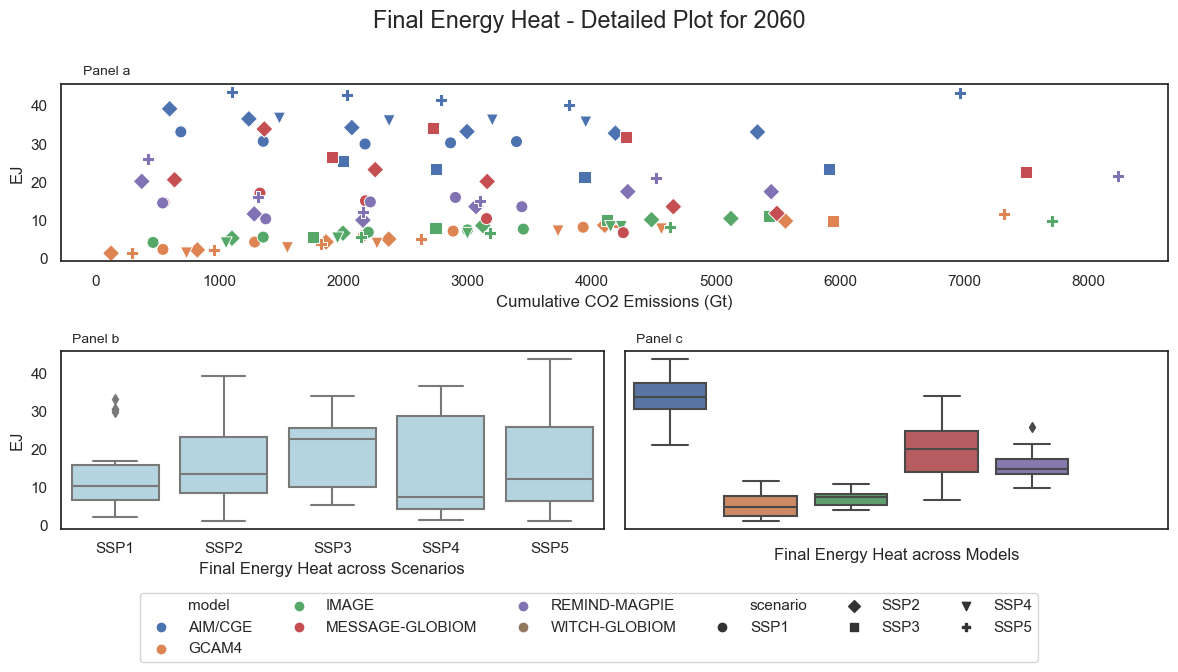

In [8]:

# Define the plot parameters for each iteration
plot_params = [
    {'variable': 'Primary Energy Biomass', 'year': 2100, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Nuclear', 'year': 2100, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Wind', 'year': 2100, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Geothermal', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Unabated Gas', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Unabated Coal', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Unabated Oil', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Gas w CCS', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Coal w CCS', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Primary Energy Oil w CCS', 'year': 2080, 'y_axis': 'EJ'},
    {'variable': 'Emissions CO2 Carbon Capture and Storage', 'year': 2100, 'y_axis': 'GtCO2'},
    {'variable': 'Final Energy Electricity', 'year': 2100, 'y_axis': 'EJ'},
    {'variable': 'Final Energy Electrification', 'year': 2100, 'y_axis': 'EJ'},
    {'variable': 'Final Energy Hydrogen', 'year': 2060, 'y_axis': 'EJ'},
    {'variable': 'Final Energy Industry', 'year': 2060, 'y_axis': 'EJ'},
    {'variable': 'Final Energy Residential and Commercial', 'year': 2060, 'y_axis': 'EJ'},
    {'variable': 'Final Energy Transportation', 'year': 2060, 'y_axis': 'EJ'},
    {'variable': 'Emissions CO2 Land Use', 'year': 2060, 'y_axis': 'GtCO2'},
    {'variable': 'Price Carbon', 'year': 2060, 'y_axis': '1,000 USD/tCO2'},
    {'variable': 'GDP PPP', 'year': 2060, 'y_axis': 'USD (1,000)'},
    {'variable': 'Final Energy Heat', 'year': 2060, 'y_axis': 'EJ', 'figure_name': 'Figure_D2'}
]


# Initialise the figure counter
figure_counter = 1

# Loop over each set of parameters
for params in plot_params:
    variable = params['variable']
    year = params['year']
    y_axis = params['y_axis']

    # --------------------------
    # Set up the style parameters
    # --------------------------
    sns.set()
    sns.set_style("white")
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rc("savefig", dpi=150)
    plt.rc("font", size=14)

    # --------------------------
    # Set up the figure
    # --------------------------
    fig = plt.figure()
    gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])
    ax1 = fig.add_subplot(gs[0, :])  # Scatter plot
    ax2 = fig.add_subplot(gs[1, 0])  # Boxplot across scenarios
    ax3 = fig.add_subplot(gs[1, 1])  # Boxplot across models

    # --------------------------
    # Plot the scatter plot
    # --------------------------
    sns.scatterplot(
        data=ssps_df.query('year == @year'),
        x="cumulative emissions",
        y=variable,
        hue="model",
        style="scenario",
        markers={"SSP1": "o", "SSP2": "D", "SSP3": ",", "SSP4": "v", "SSP5": "P"},
        s=75,
        ax=ax1
    )
    # Set up a separate legend for the scatter plot
    ax1.legend([], [], frameon=False)

    # Move the legend of ax1 to the bottom center of the plot below the boxplots
    fig.legend(
        loc='lower center',
        ncol=6,
        bbox_to_anchor=(0.5, -0.12),
        bbox_transform=fig.transFigure
    )

    # axis labels
    ax1.set(
        xlabel='Cumulative CO2 Emissions (Gt)',
        ylabel=y_axis
    )

    # Add a side title for the scatter plot
    ax1.text(
        0.02, 1.1,
        "Panel a",
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax1.transAxes,
        fontsize=10
    )

    # --------------------------
    # Set up the boxplot across scenarios
    # --------------------------
    sns.boxplot(
        data=ssps_df.query('year == @year'),
        x="scenario",
        y=variable,
        ax=ax2,
        color='lightblue'
    )

    # axis labels
    ax2.set(
        xlabel=f'{variable} across Scenarios',
        ylabel=y_axis
    )

    # Add a side title for the box plot
    ax2.text(
        0.02, 1.1,
        "Panel b",
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax2.transAxes,
        fontsize=10
    )

    # --------------------------
    # Set up the boxplot across models
    # --------------------------
    sns.boxplot(
        data=ssps_df.query('year == @year'),
        x="model",
        y=variable,
        ax=ax3
    )

    # axis labels
    ax3.set(
        xlabel=f'{variable} across Models',
        ylabel=None
    )

    # Remove the x-axis and y-axis labels for ax3 only
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])

    # Add a side title for the box plot
    ax3.text(
        0.02, 1.1,
        "Panel c",
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax3.transAxes,
        fontsize=10
    )

    # --------------------------
    # Overall plot parameters
    # --------------------------
    fig.suptitle(f'{variable} - Detailed Plot for {year}')
    fig.tight_layout()

    # Determine the file name
    if 'figure_name' in params:
        file_name = params['figure_name'] + '.png'
    else:
        file_name = f'Figure_C{figure_counter}.png'
        figure_counter += 1

    # Save the figure
    plt.savefig(file_name)
    plt.show()
    plt.close(fig)  
